# Модуль 2

Загрузим из папки training_datasets файл clock.mp4

In [42]:
import cv2
import matplotlib.pyplot as plt
cap = cv2.VideoCapture('training_datasets/clock.mp4')


Сделаем предобработку данных, уменьшим количество каналов до 1, а также обрежем изображение, чтобы на изображении остался только циферблат, сохраним все изображения в папку data

In [ ]:
i = 1
while (True):
    ret, frame = cap.read()
    gray = frame[:, :, 0].copy()
    for x in range(frame.shape[1]):
          for y in range(frame.shape[0]):
             gray[y][x]= (0.11 * frame[y][x][0] + 0.6 * frame[y][x][1] + 0.3 * frame[y][x][2])
    gray = gray[10:350, 150:485]
    cv2.imwrite('data/' + str(i) + '.png',gray)
    i+=1
    if cv2.waitKey(1) == 27:
        break

Выведем новый размер изображения

In [43]:
gray.shape

(340, 335)

Рассчитаем соотношение: было 12 * 60 * 60 трехканальное фото размера 640 * 320, стало  12 * 60 * 60 одноканальное фото размера 340 * 355, количество точек уменьшилось в 5.394205443371378 раз

In [3]:
print((12*60*60*640*320*3)/(12*60*60*340*335*1))


5.394205443371378


Создадим разметку, для каждой картинки запишем значение часов, минут, секунд

In [65]:
h, m, s = [],[],[]

In [66]:
import os
from PIL import Image
i=0
X = []
for file in os.listdir('data'):
    img = Image.open('data/1.png')
    img = img.resize((28,28))
    x = np.asarray(img).flatten()
    h.append(i//3600)
    m.append(i//60)
    s.append(i % 60)
    i+=1
    X.append(x)

Разобьем датасет на обучающуюся и тестовую выборку

In [61]:
from sklearn.model_selection import train_test_split

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, s, test_size=0.2, random_state=42)

 Обучим логистическую регрессию предсказывать по фото секунды

In [63]:
from sklearn.linear_model import LogisticRegression

In [78]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.009029345372460496

Точность низкая из-за того что фото было развернуто в одномерный массив, а не преобразовано через свертки

# Работа с audio.wav

Загрузим из папки training_datasets файл audio.wav

In [4]:
import librosa
import librosa.display as ld
import matplotlib.pyplot as plt
import numpy as np
import time

In [5]:
signal, sr = librosa.load('training_datasets/audio.wav', sr = 22050)

Выведем звуковую волну 

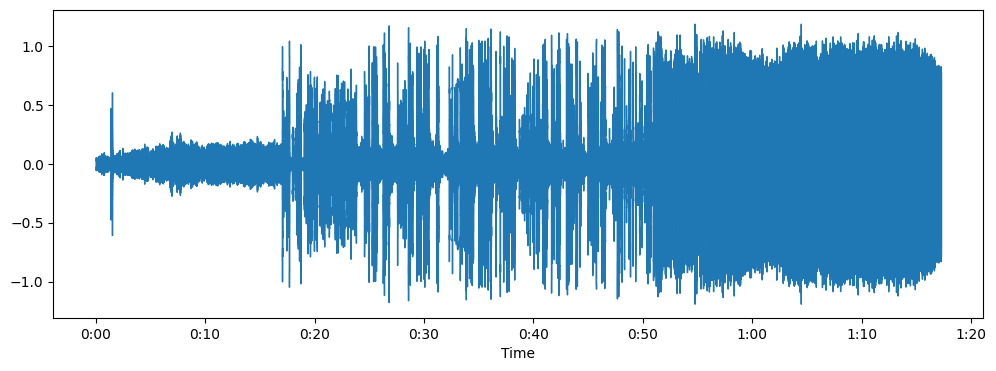

In [6]:
plt.figure(figsize=(12,4))
ld.waveshow(signal, sr=sr)

Построим спектрограмму и выведем на экран

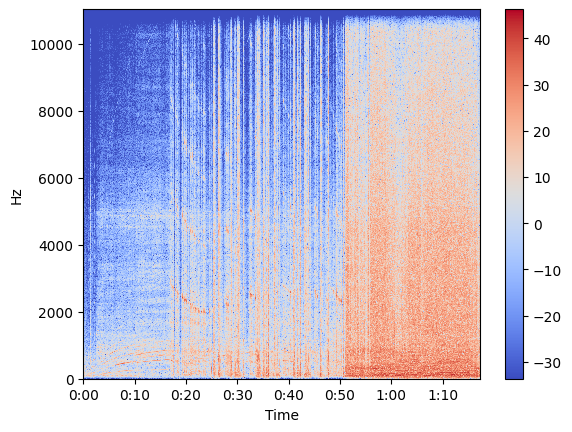

In [7]:
X = librosa.stft(signal)
s = librosa.amplitude_to_db(abs(X))
ld.specshow(s, sr=sr, x_axis = 'time', y_axis='linear')
plt.colorbar()

выполнbм преобразование Фурье и выведем получившиеся значения в виде графика

Text(0, 0.5, 'Amplitude')

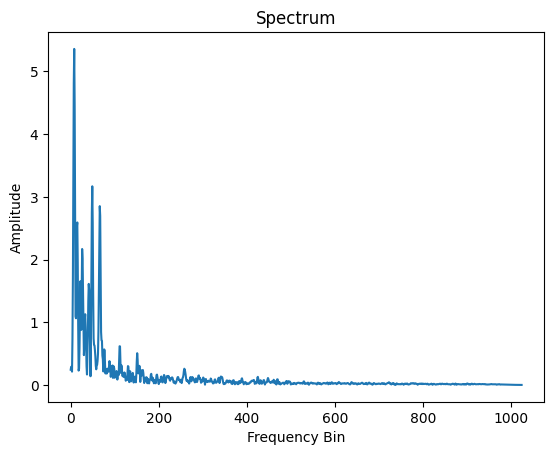

In [8]:
n_fft = 2048
ft = np.abs(librosa.stft(signal[:n_fft], hop_length = n_fft+1))
plt.plot(ft)
plt.title('Spectrum')
plt.xlabel('Frequency Bin')
plt.ylabel('Amplitude')

Загрузим из папки training_datasets файл higgs.csv

In [9]:
import pandas as pd
from skimpy import skim
import seaborn as sns
from sklearn.cluster import KMeans

In [10]:
df = pd.read_csv('training_datasets/higgs.csv', low_memory=False)

In [11]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 98050  │ │ float64     │ 19    │                                                          │
│ │ Number of columns │ 29     │ │ string      │ 9     │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name  ┃ NA ┃ NA % ┃ mean       ┃ sd     ┃ p0       ┃ p25     ┃ p50        ┃ p75    ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ is_boson     │  0 │    0 │     0.5286 │ 0.4992 │        0 │       0 │          1 │      1 │     1 │ ▇    ▇ │  │
│ │ lepton_pT    │  0 │    0 │     0.9903 │ 0.5618 │   0.2747 │  0.5909 │     0.8548 │  1.237 │ 7.806 │   ▇▁   │  │
│ │ lepton_eta   │  0 │    0 │   -0.00395 │  1.005 │   -2.435 │  -0.741 │  -0.002976 │ 0.7343 │ 2.434 │ ▂▅▇▇▅▂ │  │
│ │ lepton_phi   │  0 │    0 │   -0.00102 │  1.006 │   -1.743 │ -0.8675 │   0.002081 │ 0.8682 │ 1.743 │ ▇▇▇▇▇▇ │  │
│ │ missing_ener │  0 │    0 │     0.9954 │ 0.5954 │ 0.001283 │  0.5757 │     0.8908 │  1.292 │ 7.999 │   ▇▂   │  │
│ │ gy_magnitude │    │      │            │        │          │         │            │        │       │        │  │
│ │ missing_ener │  0 │    0 │  -0.007896 │  1.007 │   -1.744 │ -0.8818 │   -0.01159 │ 0.8651 │ 1.743 │ ▇▇▇▇▇▇ │  │
│ │ gy_phi       │    │      │            │        │          │         │            │        │       │        │  │
│ │ jet1pt       │  0 │    0 │     0.9871 │ 0.4733 │     0.14 │  0.6763 │     0.8922 │  1.168 │ 7.065 │   ▇▂   │  │
│ │ jet1eta      │  0 │    0 │  -0.003187 │  1.008 │   -2.969 │ -0.6892 │  -0.001016 │ 0.6832 │  2.97 │ ▁▃▇▇▃▁ │  │
│ │ jet1phi      │  0 │    0 │ -0.0001583 │  1.009 │   -1.741 │ -0.8681 │  -0.004931 │ 0.8711 │ 1.741 │ ▇▇▇▇▇▇ │  │
│ │ jet1b-tag    │  0 │    0 │     0.9985 │  1.027 │        0 │       0 │      1.087 │  2.173 │ 2.173 │ ▇  ▂ ▇ │  │
│ │ jet2pt       │  0 │    0 │     0.9912 │ 0.4981 │    0.189 │   0.657 │     0.8893 │  1.199 │  8.28 │   ▇▁   │  │
│ │ jet2eta      │  0 │    0 │ -0.0002687 │  1.005 │   -2.913 │ -0.6945 │   0.002974 │ 0.6926 │ 2.913 │ ▁▃▇▇▃▁ │  │
│ │ jet2phi      │  0 │    0 │    0.00401 │  1.007 │   -1.742 │  -0.868 │   0.009609 │ 0.8771 │ 1.743 │ ▇▇▇▇▇▇ │  │
│ │ jet2b-tag    │  0 │    0 │      1.004 │  1.049 │        0 │       0 │      1.107 │  2.215 │ 2.215 │ ▇  ▁ ▇ │  │
│ │ jet3pt       │  0 │    0 │     0.9937 │ 0.4883 │   0.2636 │  0.6549 │     0.8987 │  1.222 │  8.51 │   ▇▁   │  │
│ │ jet3eta      │  0 │    0 │   0.002821 │  1.009 │    -2.73 │ -0.6953 │   0.001993 │  0.702 │  2.73 │ ▁▃▇▇▃▁ │  │
│ │ jet3phi      │  0 │    0 │   0.001335 │  1.006 │   -1.742 │ -0.8656 │ -0.0007519 │ 0.8736 │ 1.743 │ ▇▇▇▇▇▇ │  │
│ │ jet3b-tag    │  0 │    0 │      1.006 │  1.196 │        0 │       0 │          0 │  2.548 │ 2.548 │ ▇  ▁ ▅ │  │
│ │ jet4pt       │  0 │    0 │     0.9859 │  0.505 │   0.3654 │  0.6175 │     0.8699 │  1.221 │ 7.706 │   ▇▁   │  │
│ │ jet4eta      │  0 │    0 │  -0.006821 │  1.009 │   -

Какие-то проблемы с данными, не все числовые значения. Вместо некоторых значений стоит ?, заменим его на 0. Также изменим тип данных на числовой

In [12]:
list_col = ['jet4phi', 'jet4b-tag', 'm_jj', 'm_jjj', 'm_lv', ' m_jlv', 'm_bb', 'm_wbb', 'm_wwbb']

In [13]:
df['is_boson'] = df['is_boson'].astype(np.uint8)
df = df.replace("?", 0)
for column in list_col:
    df[column] = df[column].astype(np.float64)

In [14]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 98050  │ │ float64     │ 28    │                                                          │
│ │ Number of columns │ 29     │ │ int32       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name  ┃ NA ┃ NA % ┃ mean       ┃ sd     ┃ p0       ┃ p25     ┃ p50        ┃ p75    ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ is_boson     │  0 │    0 │     0.5286 │ 0.4992 │        0 │       0 │          1 │      1 │     1 │ ▇    ▇ │  │
│ │ lepton_pT    │  0 │    0 │     0.9903 │ 0.5618 │   0.2747 │  0.5909 │     0.8548 │  1.237 │ 7.806 │   ▇▁   │  │
│ │ lepton_eta   │  0 │    0 │   -0.00395 │  1.005 │   -2.435 │  -0.741 │  -0.002976 │ 0.7343 │ 2.434 │ ▂▅▇▇▅▂ │  │
│ │ lepton_phi   │  0 │    0 │   -0.00102 │  1.006 │   -1.743 │ -0.8675 │   0.002081 │ 0.8682 │ 1.743 │ ▇▇▇▇▇▇ │  │
│ │ missing_ener │  0 │    0 │     0.9954 │ 0.5954 │ 0.001283 │  0.5757 │     0.8908 │  1.292 │ 7.999 │   ▇▂   │  │
│ │ gy_magnitude │    │      │            │        │          │         │            │        │       │        │  │
│ │ missing_ener │  0 │    0 │  -0.007896 │  1.007 │   -1.744 │ -0.8818 │   -0.01159 │ 0.8651 │ 1.743 │ ▇▇▇▇▇▇ │  │
│ │ gy_phi       │    │      │            │        │          │         │            │        │       │        │  │
│ │ jet1pt       │  0 │    0 │     0.9871 │ 0.4733 │     0.14 │  0.6763 │     0.8922 │  1.168 │ 7.065 │   ▇▂   │  │
│ │ jet1eta      │  0 │    0 │  -0.003187 │  1.008 │   -2.969 │ -0.6892 │  -0.001016 │ 0.6832 │  2.97 │ ▁▃▇▇▃▁ │  │
│ │ jet1phi      │  0 │    0 │ -0.0001583 │  1.009 │   -1.741 │ -0.8681 │  -0.004931 │ 0.8711 │ 1.741 │ ▇▇▇▇▇▇ │  │
│ │ jet1b-tag    │  0 │    0 │     0.9985 │  1.027 │        0 │       0 │      1.087 │  2.173 │ 2.173 │ ▇  ▂ ▇ │  │
│ │ jet2pt       │  0 │    0 │     0.9912 │ 0.4981 │    0.189 │   0.657 │     0.8893 │  1.199 │  8.28 │   ▇▁   │  │
│ │ jet2eta      │  0 │    0 │ -0.0002687 │  1.005 │   -2.913 │ -0.6945 │   0.002974 │ 0.6926 │ 2.913 │ ▁▃▇▇▃▁ │  │
│ │ jet2phi      │  0 │    0 │    0.00401 │  1.007 │   -1.742 │  -0.868 │   0.009609 │ 0.8771 │ 1.743 │ ▇▇▇▇▇▇ │  │
│ │ jet2b-tag    │  0 │    0 │      1.004 │  1.049 │        0 │       0 │      1.107 │  2.215 │ 2.215 │ ▇  ▁ ▇ │  │
│ │ jet3pt       │  0 │    0 │     0.9937 │ 0.4883 │   0.2636 │  0.6549 │     0.8987 │  1.222 │  8.51 │   ▇▁   │  │
│ │ jet3eta      │  0 │    0 │   0.002821 │  1.009 │    -2.73 │ -0.6953 │   0.001993 │  0.702 │  2.73 │ ▁▃▇▇▃▁ │  │
│ │ jet3phi      │  0 │    0 │   0.001335 │  1.006 │   -1.742 │ -0.8656 │ -0.0007519 │ 0.8736 │ 1.743 │ ▇▇▇▇▇▇ │  │
│ │ jet3b-tag    │  0 │    0 │      1.006 │  1.196 │        0 │       0 │          0 │  2.548 │ 2.548 │ ▇  ▁ ▅ │  │
│ │ jet4pt       │  0 │    0 │     0.9859 │  0.505 │   0.3654 │  0.6175 │     0.8699 │  1.221 │ 7.706 │   ▇▁   │  │
│ │ jet4eta      │  0 │    0 │  -0.006821 │  1.009 │   -2.497 │ -0.7242 │  -0.009622 │ 0.7116 │ 2.498 │ ▁▅▇▇▅▁ │  │
│ │ jet4phi      │  0 │    0 │  -0.004252 │  1.007 │   -

Посмотрим на матрицу корреляции, может получится удалить какой-то признак при сильной корреляци

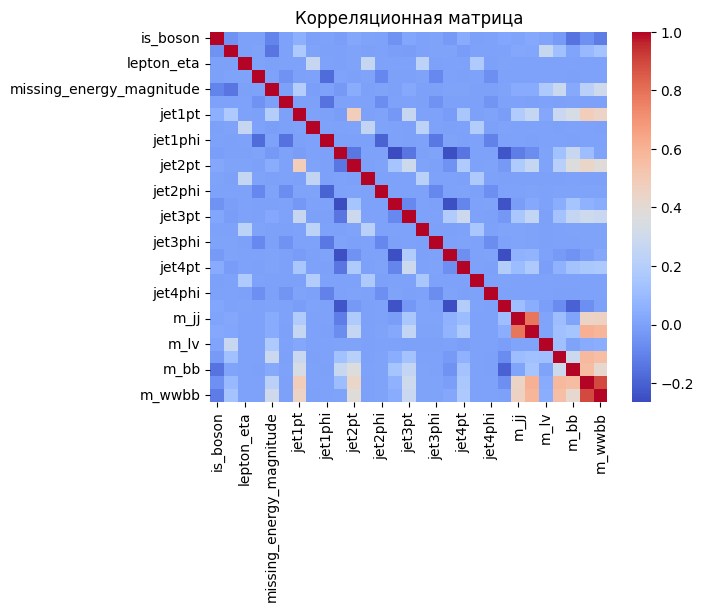

In [15]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

Сильной корреляции не наблюдается, оставляем так

В качестве метрики используем сумму квадратов расстояний от точек до центроидов кластеров, к которым они относятся, так как это значение легко высчитывается и позволяет оценить влияение количества кластеров на расстояние до центроидов

Построим график изменения метрики кластеризации в зависимости от числа кластеров и время, затрачиваемое на кластеризацию

Всего существует 5 видов элементарных бозонов: Бозон Хиггса, γ–фотон,Глюоны,Z, W ±. Значит за количество кластеров стоит взять значения от 2 до 6, так как есть 5 видов бозонов, но не все из частиц в датасете являются бозонами, поэтому еще один кластер можно оставить для частиц не бозонов

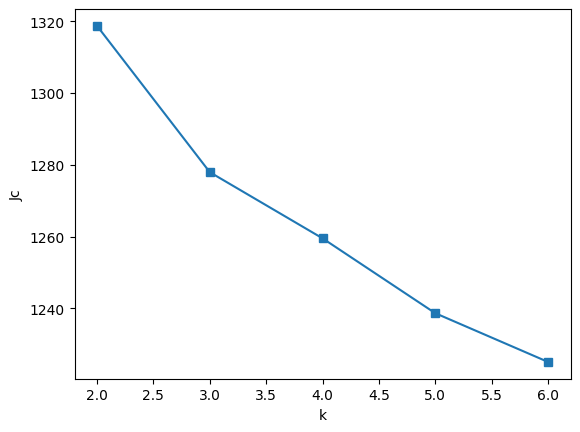

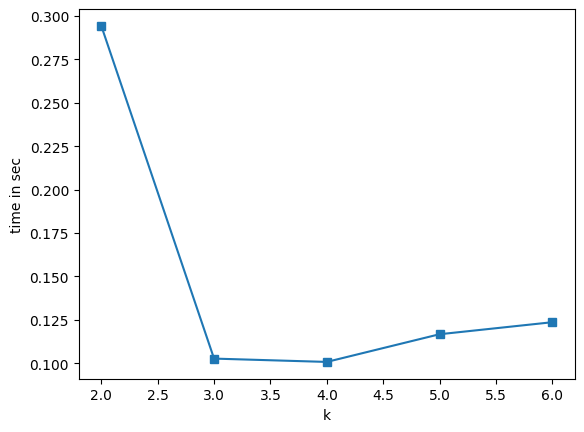

In [16]:
inertia = []
times = []
for k in range(2, 7):
    start_time = time.time()
    kmeans = KMeans(n_clusters=k, random_state=1).fit(df)
    timer = time.time() - start_time
    times.append(timer)
    inertia.append(np.sqrt(kmeans.inertia_))
plt.plot(range(2, 7), inertia, marker='s')
plt.xlabel('k')
plt.ylabel('Jc')
plt.show()
plt.plot(range(2, 7), times, marker='s')
plt.xlabel('k')
plt.ylabel('time in sec')
plt.show()

Выведем визуализацию отображения номера кластера на исходные данные для столбцов lepton_eta и jet3eta

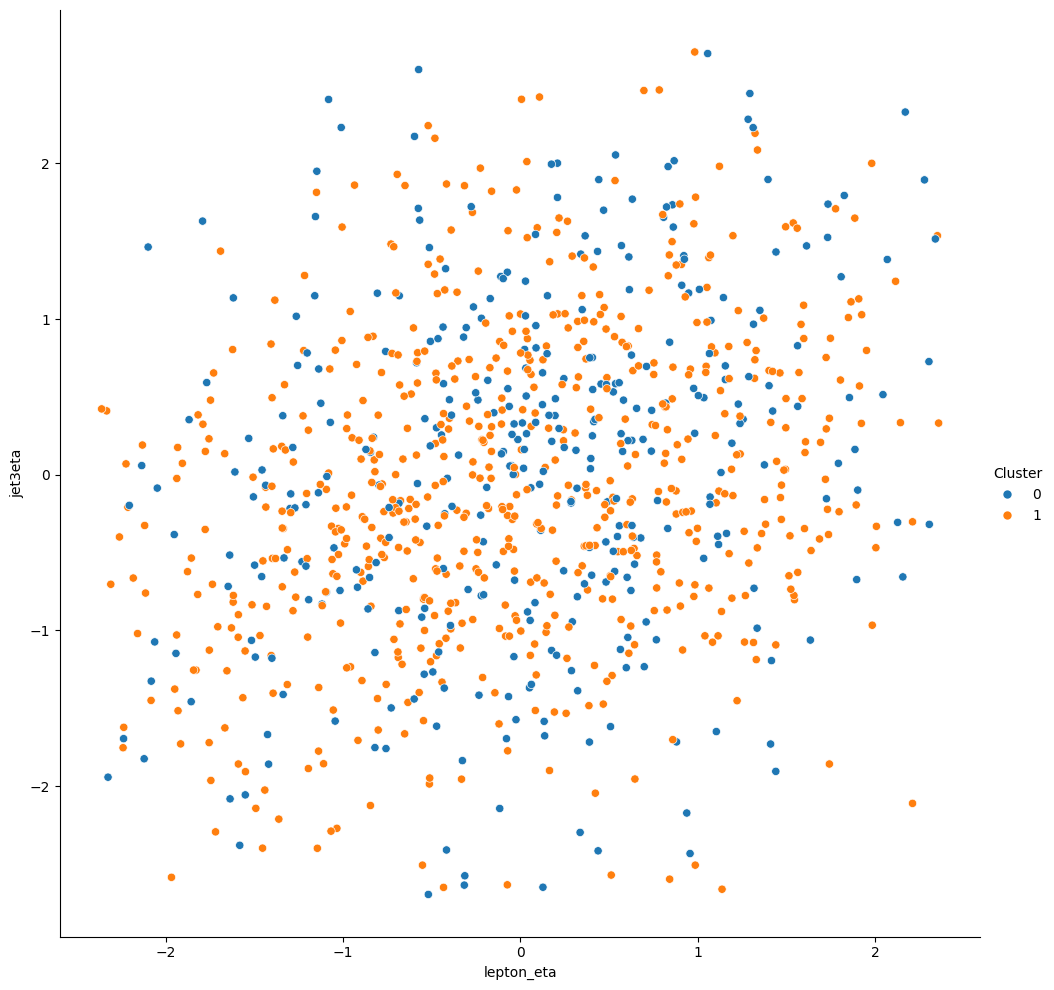

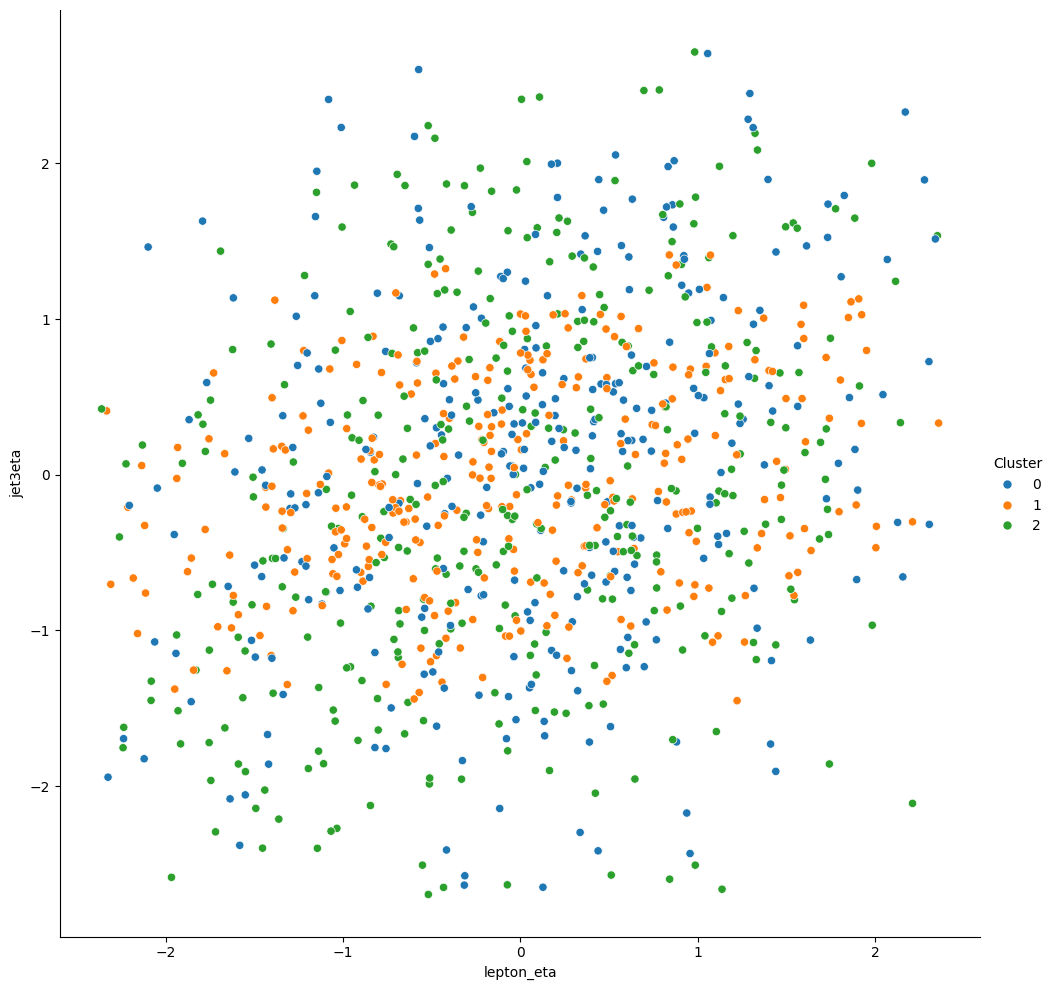

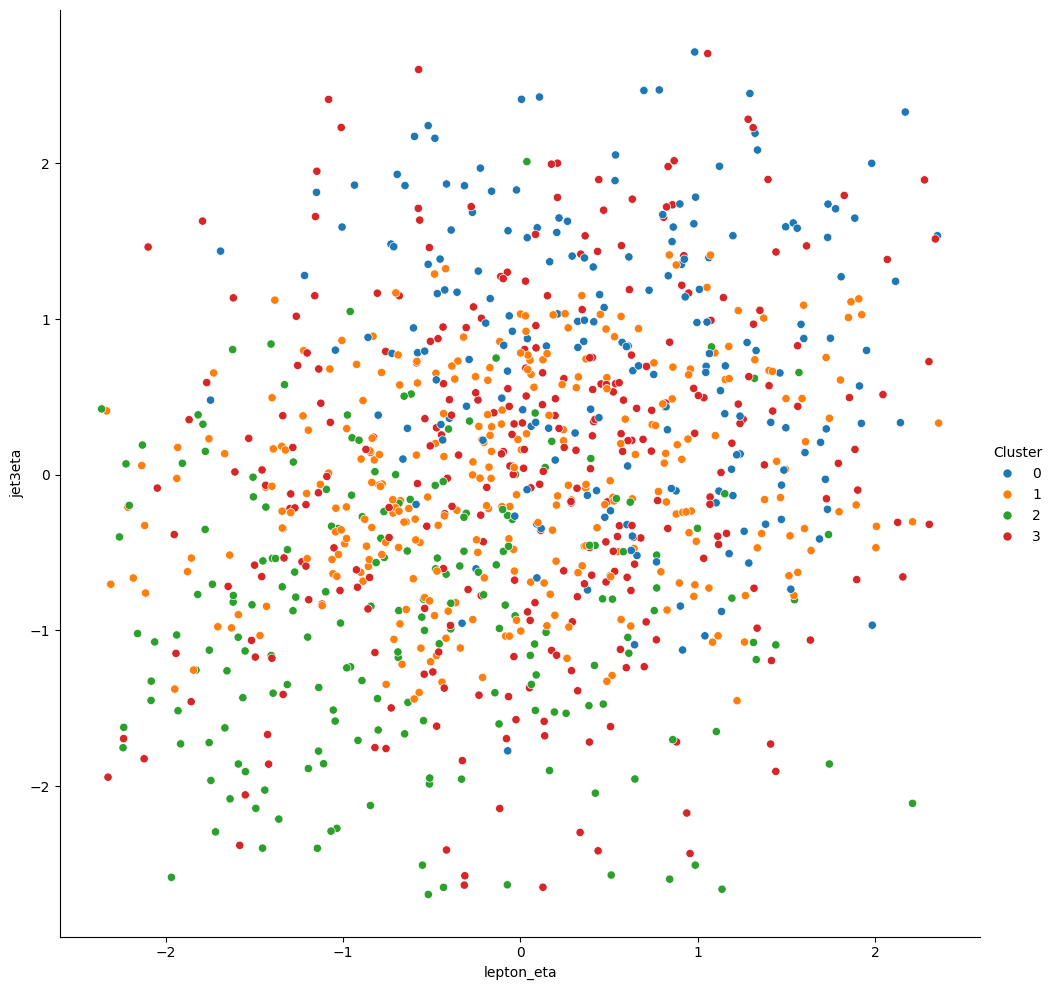

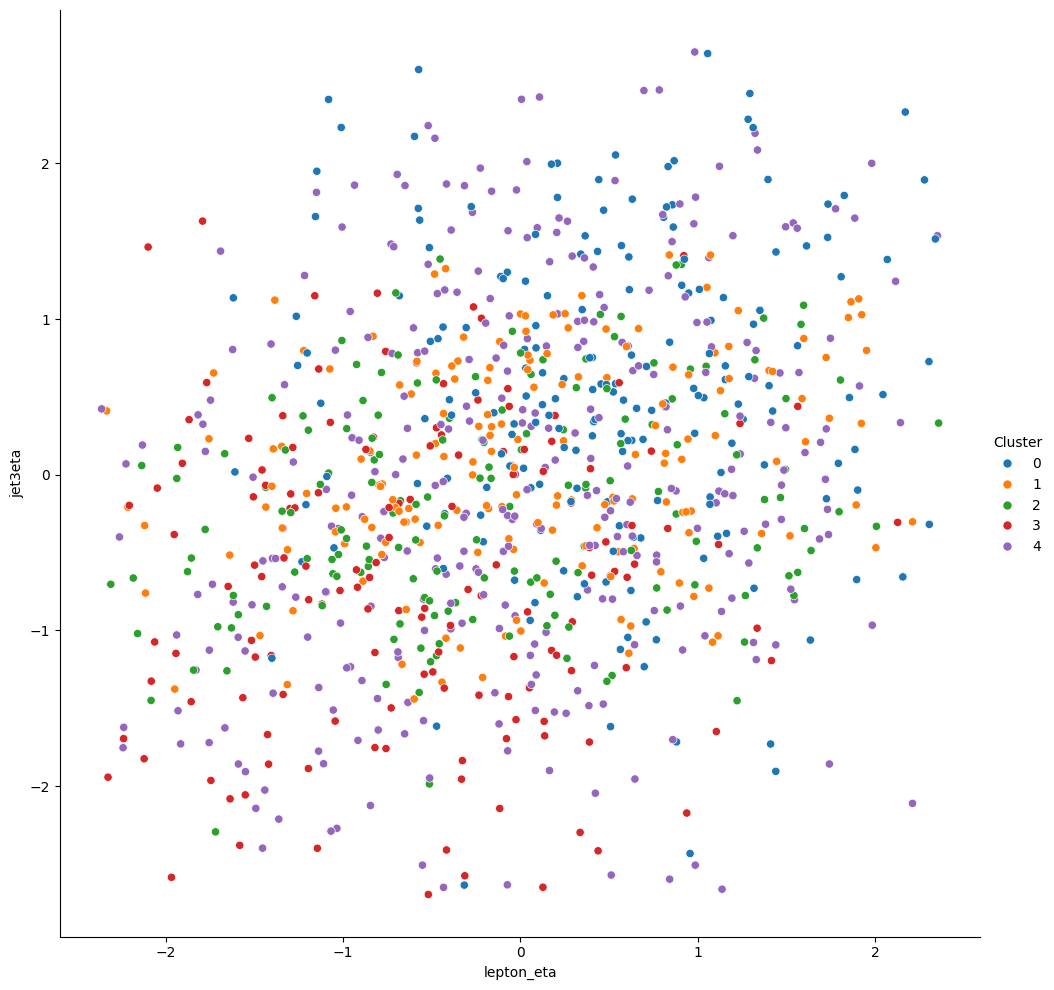

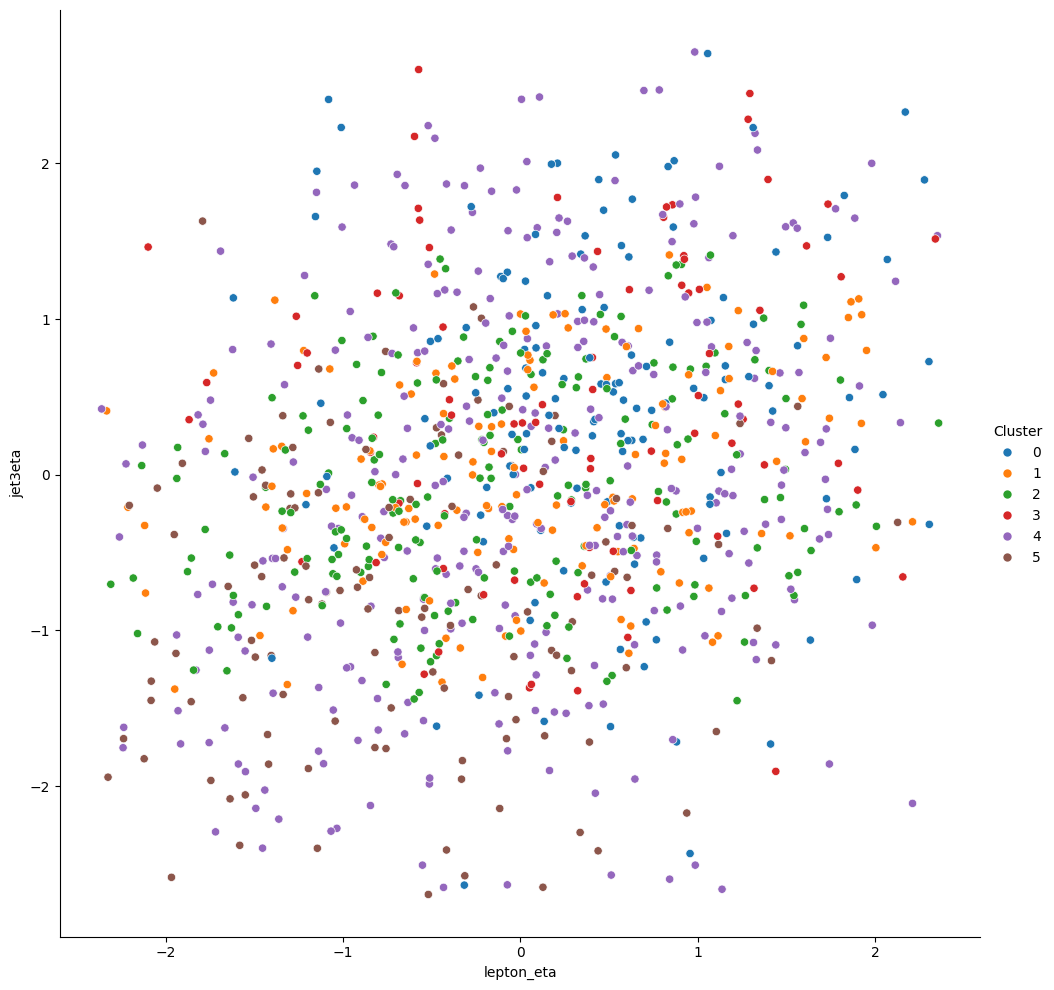

In [17]:
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(df)
    df_sample = df.sample(n=1000, random_state=1)
    df_sample["Cluster"] = kmeans.fit_predict(df_sample)
    df_sample["Cluster"] = df_sample["Cluster"].astype("category")
    sns.relplot(x="lepton_eta", y="jet3eta", hue="Cluster", data=df_sample, height=10)

Данные плохо разделились, из-за сложности задачи и большого кличества фич, предсказать, в каком кластере находится бозон Хиггса, не представляется возможным

Метод кластеризации плохо подходит для задачи определения наличия бозонов Хиггса в экспериментах, так как количество измерений затрудняет визуализацию кластеров и выявление значимых закономерностей в данных. Хорошей идеей было бы выделить наиболее важные признаки с помощью PCA, но не хватает разметки для наличия бозона Хиггса

Сделаем предобработку данных, уменьшим количество каналов до 1, а также обрежем изображение, чтобы на изображении остался только циферблат

# Вывод

В результате выполнени модуля:
 - был обработан файл clock.mp4, произведена предобраю=ботка и уменьшена размерность, также была сделана разметка данных, разделение данных на test и train
 - исследован audio.wav, выведена спектрограмма и график после преобразование Фурье
 - загружен файл higgs.csv, заменены некорректные значения, произведена кластеризация для различного количества кластеров, построена визуализация графиков, сделан вывод о том, что кластеризация плохо подходит для решения задачи обнаружения бозонов